# Temática del Proyecto
Precios de alojamientos de Airbnb
# Descripción de la temática
En el vertiginoso ritmo del mundo actual, la manera en que viajamos y encontramos alojamiento ha sido revolucionada por plataformas como Airbnb. Este dinámico mercado ha empoderado tanto a los propietarios de inmuebles como a los viajeros, al ofrecer una vasta gama de opciones para hospedarse. No obstante, un desafío constante sigue siendo establecer el precio óptimo para un anuncio. Los anfitriones buscan maximizar sus ingresos manteniendo precios competitivos, mientras que los huéspedes anhelan obtener la mejor relación calidad-precio. Encontrar un equilibrio entre estos intereses puede ser un reto, lo que subraya la relevancia de la predicción de precios en Airbnb.
El Dataset ofrece registros de distintos hospedajes en las ciudades más importantes de EEUU, relevando además precios; tipo de propiedad y habitación; comodidades; cantidad de baños, dormitorios y camas; y detalles de reseñas entre otros datos.
# Objetivo
Con este cuadro de situación, se analizarán los precios en función de distintas variables alcanzadas en el Dataset con el fin de poder determinar ciertas relaciones, patrones y/o tendencias. Se analizará el grado de influencia sobre los precios que ponderan las variables como tipo de habitación y/o propiedad, puntuación del alojamiento, ciudad o cantidad de camas y/o baños que presenta el hospedaje.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

url = 'https://raw.githubusercontent.com/rodrigomartin129/Curso-Data-Science-I/master/Dataset/Airbnb_Data.csv'
df = pd.read_csv(url, index_col=0)

## Información del dataset
### Vista de los datos

In [2]:
df.head(10)

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
id,,,,,,,,,,,,,,,,,,,,,
6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,...,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0
11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,LA,...,33.980454,-118.462821,Beach Town Studio and Parking!!!11h,NaN,15,97.0,https://a0.muscache.com/im/pictures/4c920c60-4...,90292,1.0,1.0
13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,LA,...,34.046737,-118.260439,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0
180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,SF,...,37.781128,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0


### Forma

In [3]:
df.shape

(74111, 28)

In [4]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

#### El dataset contiene 28 columnas más el identificador y 74111 registros
##### El **índice** se compone por:
-  0 - **id:** Identificador único
-  1 - **log_price:** Registro detallado del precio
-  2 - **property_type:** Tipo de propiedad
-  3 - **room_type:** Tipo de habitación
-  4 - **amenities:** Comodidades
-  5 - **accommodates:** Espacios
-  6 - **bathrooms:** Baños
-  7 - **bed_type:** Tipo de cama
-  8 - **cancellation_policy:** Política de cancelación
-  9 - **cleaning_fee:** Cargo por limpieza
- 10 - **city:** Ciudad
- 11 - **description:** Descripción
- 12 - **first_review:** Primera reseña
- 13 - **host_has_profile_pic:** El anfitrión tiene foto de perfil
- 14 - **host_identity_verified:** Identidad del anfitrión verificada
- 15 - **host_response_rate:** Tasa de respuesta del anfitrión
- 16 - **host_since:** Anfitrión desde
- 17 - **instant_bookable:** Reserva instantánea
- 18 - **last_review:** Última reseña
- 19 - **latitude:** Latitud
- 20 - **longitude:** Longitud
- 21 - **name:** Nombre
- 22 - **neighbourhood:** Barrio
- 23 - **number_of_reviews:** Número de reseñas
- 24 - **review_scores_rating:** Puntuación de reseñas
- 25 - **thumbnail_url:** Imagen de perfil
- 26 - **zipcode:** Código postal
- 27 - **bedrooms:** Dormitorios
- 28 - **beds:** Camas

### Información General del Dataframe por cada columna

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74111 entries, 6901257 to 3534845
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   amenities               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               73911 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  description             74111 non-null  object 
 11  first_review            58247 non-null  object 
 12  host_has_profile_pic    73923 non-null  object 
 13  host_identity_verified  73923 non-null  object 
 14  host_response_rate      55812 non-n

## Descripción General

In [6]:
df.describe().round(1)

,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,74111.0,74111.0,73911.0,74111.0,74111.0,74111.0,57389.0,74020.0,73980.0
mean,4.8,3.2,1.2,38.4,-92.4,20.9,94.1,1.3,1.7
std,0.7,2.2,0.6,3.1,21.7,37.8,7.8,0.9,1.3
min,0.0,1.0,0.0,33.3,-122.5,0.0,20.0,0.0,0.0
25%,4.3,2.0,1.0,34.1,-118.3,1.0,92.0,1.0,1.0
50%,4.7,2.0,1.0,40.7,-77.0,6.0,96.0,1.0,1.0
75%,5.2,4.0,1.0,40.7,-74.0,23.0,100.0,1.0,2.0
max,7.6,16.0,8.0,42.4,-71.0,605.0,100.0,10.0,18.0


Las columnas que presentaron mínimos igual a 0 son:
1. log_price: Registro detallado del precio
6. bathrooms: Baños
23. number_of_reviews: Número de reservas
27. bedrooms: Dormitorios
28. beds: Camas
    
Se observan que tiene poco sentido práctico hospedajes con precios valor 0 o con ninguna cama. 

La cantidad de valores 0 por cada columna sería:

In [7]:
num_ceros = (df[['log_price','bathrooms','number_of_reviews','bedrooms','beds']] == 0).sum()
print(num_ceros)

log_price                1
bathrooms              198
number_of_reviews    15819
bedrooms              6715
beds                     4
dtype: int64


Analizamos aquellos hospedajes con valores 0 tanto en precios como en camas para modificar dichos valores:

In [8]:
hospedaje_sin_precio = df[df['log_price'] == 0]
print(hospedaje_sin_precio)

          log_price property_type    room_type  \
id                                               
17972519        0.0   Condominium  Shared room   

                                                  amenities  accommodates  \
id                                                                          
17972519  {TV,"Wireless Internet","Air conditioning",Kit...             1   

          bathrooms  bed_type cancellation_policy  cleaning_fee city  ...  \
id                                                                    ...   
17972519        1.0  Real Bed              strict          True  NYC  ...   

           latitude  longitude            name neighbourhood  \
id                                                             
17972519  40.838054 -73.858665  Esteem's Place   Parkchester   

         number_of_reviews review_scores_rating  \
id                                                
17972519                 3                 87.0   

                                      

Se reemplazará el precio por uno o el promedio de varios hospedajes en la misma zona con similar tipo de propiedad. 
Los hospedajes Condominio ubicados en Parkchester, NYC son:

In [9]:
hospedajes_similares_17972519 = df[(df['city'] == 'NYC') & (df['neighbourhood'] == 'Parkchester') & (df['property_type'] == 'Condominium')]
print(hospedajes_similares_17972519)

          log_price property_type        room_type  \
id                                                   
521522     4.077537   Condominium     Private room   
13222086   4.605170   Condominium  Entire home/apt   
17972519   0.000000   Condominium      Shared room   
13314442   3.806662   Condominium     Private room   
1844254    4.174387   Condominium  Entire home/apt   
5013658    4.828314   Condominium     Private room   
8016725    5.003946   Condominium  Entire home/apt   

                                                  amenities  accommodates  \
id                                                                          
521522    {TV,Internet,"Wireless Internet","Air conditio...             2   
13222086  {"Wireless Internet","Air conditioning",Kitche...             2   
17972519  {TV,"Wireless Internet","Air conditioning",Kit...             1   
13314442  {TV,"Wireless Internet","Air conditioning",Kit...             2   
1844254   {TV,"Wireless Internet","Air conditioning

In [10]:
precio_promedio = hospedajes_similares_17972519['log_price'].mean()
print(f"El precio promedio de hospedajes similares es: {precio_promedio:.2f}")

El precio promedio de hospedajes similares es: 3.79


Se reemplaza el precio valor 0 del hospedaje Id: 17972519 por 3.79 

In [11]:
df.loc[17972519, 'log_price'] = precio_promedio

Ahora identificaremos cuales hospedajes no tienen camas y le asignaremos 1.

In [12]:
hospedaje_sin_camas = df[df['beds'] == 0]
print(hospedaje_sin_camas)

          log_price property_type        room_type  \
id                                                   
7922378    5.129899     Apartment  Entire home/apt   
20269147   5.783825         House  Entire home/apt   
8684344    4.691348     Apartment  Entire home/apt   
15419976   5.991465         House  Entire home/apt   

                                                  amenities  accommodates  \
id                                                                          
7922378   {TV,Internet,"Wireless Internet",Kitchen,Washe...             2   
20269147  {TV,Internet,"Wireless Internet","Air conditio...             2   
8684344   {TV,"Cable TV",Internet,"Wireless Internet","A...             2   
15419976  {TV,Internet,"Wireless Internet","Air conditio...             4   

          bathrooms  bed_type cancellation_policy  cleaning_fee    city  ...  \
id                                                                       ...   
7922378         1.0  Real Bed              strict   

In [13]:
df.loc[7922378, 'beds'] = 1.0
df.loc[20269147, 'beds'] = 1.0
df.loc[8684344, 'beds'] = 1.0
df.loc[15419976, 'beds'] = 1.0

### Eliminación de las columnas innecesarias

In [14]:
print(df.columns)

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')


In [15]:
columnas_eliminadas = [col for col in ['description', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'latitude', 'longitude', 'name', 'thumbnail_url', 'zipcode'] if col in df.columns]
df = df.drop(columnas_eliminadas, axis=1)
df.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,last_review,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
id,,,,,,,,,,,,,,,,,
6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,2016-06-18,2016-07-18,Brooklyn Heights,2,100.0,1.0,1.0
6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,2017-08-05,2017-09-23,Hell's Kitchen,6,93.0,3.0,3.0
7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,2017-04-30,2017-09-14,Harlem,10,92.0,1.0,3.0
13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,NaN,NaN,Lower Haight,0,NaN,2.0,2.0
3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,2015-05-12,2017-01-22,Columbia Heights,4,40.0,0.0,1.0


### Visión General del DataFrame definitivo

In [16]:
print(df.columns)

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'first_review', 'last_review', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds'],
      dtype='object')


In [17]:
index = ['log_price', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'first_review', 'last_review', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds']

for i in index:
    print(f"\nColumn: {i}")
    #print(df[i].value_counts().head())  # Muestra solo los 5 valores más frecuentes
    print(df[i].value_counts()) 
    print("---------------------------------------------------------------")


Column: log_price
log_price
5.010635    2729
4.605170    2707
4.317488    2049
5.298317    1923
3.912023    1920
            ... 
7.013016       1
6.714171       1
6.045005       1
7.377134       1
6.357842       1
Name: count, Length: 767, dtype: int64
---------------------------------------------------------------

Column: property_type
property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11


### Valores nulos por cada columna

In [18]:
df.isnull().sum()

log_price                   0
property_type               0
room_type                   0
amenities                   0
accommodates                0
bathrooms                 200
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
first_review            15864
last_review             15827
neighbourhood            6872
number_of_reviews           0
review_scores_rating    16722
bedrooms                   91
beds                      131
dtype: int64

### Reemplazo de los valores NaN

In [19]:
# Se reemplaza los valores NaN de las columnas first_review y last_review por el último valor no 
# nulo anterior en la columna

df['first_review'] = df.first_review.ffill()
df['last_review'] = df.last_review.ffill()

# se reemplaza los valores NaN de la columna review_scores_rating por el valor 0
df["review_scores_rating"] = df.review_scores_rating.fillna(0)

In [20]:
# se reemplaza los valores NaN de la columna bathrooms por el valor de la mediana
df["bathrooms"] = df.bathrooms.fillna(round(df["bathrooms"].median()))

# Visualización de la información

In [21]:
# Se crea un nuevo df para graficar

df_precios = df['log_price'].value_counts().reset_index()
df_precios = df_precios.rename(columns={'log_price':'Precios', 'count':'Cantidad'})
df_precios

,Precios,Cantidad
0,5.010635,2729
1,4.605170,2707
2,4.317488,2049
3,5.298317,1923
4,3.912023,1920
...,...,...
762,7.013016,1
763,6.714171,1
764,6.045005,1
765,7.377134,1


Text(0, 0.5, 'Cantidad')

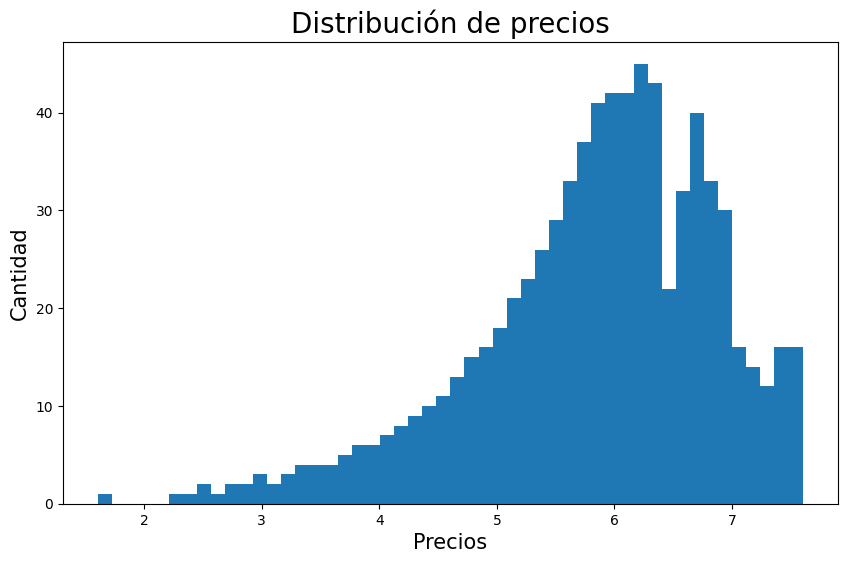

In [22]:
# Se crea el histograma con la distribución de precios.
## MATPLOTLIB 1 ##

fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(df_precios.Precios, bins=50)
ax.set_title('Distribución de precios', fontsize=20)
ax.set_xlabel('Precios', fontsize=15)
ax.set_ylabel('Cantidad', fontsize=15)


De este gráfico se puede concluir que entre los precios 5 y 7 se encuentra la mayor cantidad de alojamientos. La distribución de precios presenta una asimetría la derecha.

Text(-10.430555555555541, 0.5, 'Cantidad')

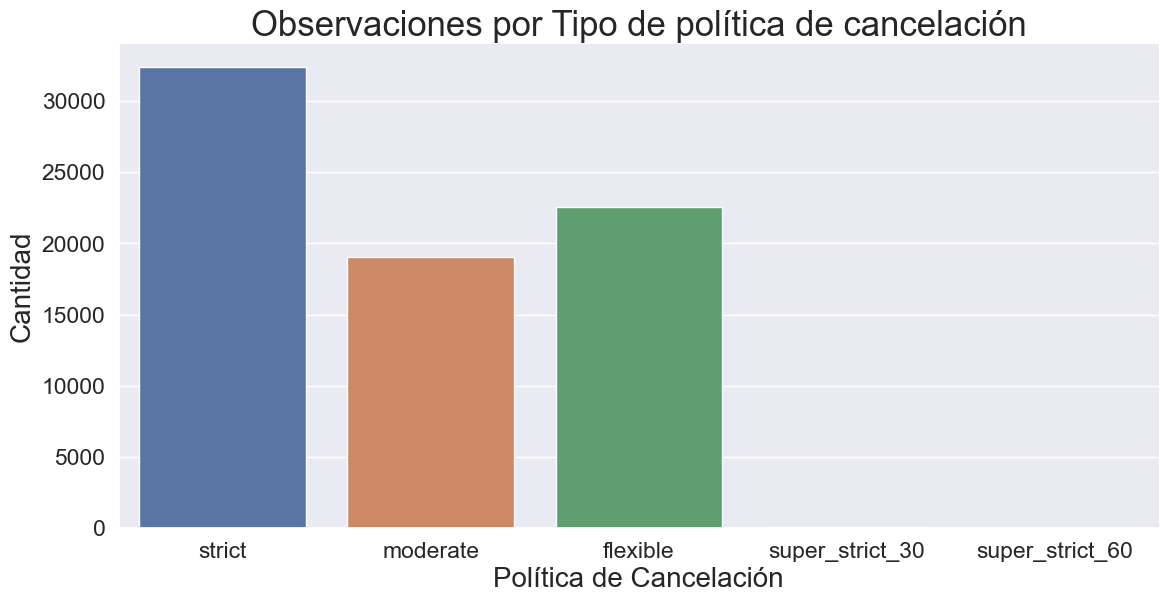

In [23]:
# Se usa con la función "catplot" un gráfico categórico donde el "kind='count'" cuenta el número de 
# observaciones en cada categoría.
## SEABORN 1 ##

sns.set(font_scale=1.5)
sns.catplot(x='cancellation_policy',kind='count',data=df, hue='cancellation_policy', height=6, aspect = 2)
plt.title('Observaciones por Tipo de política de cancelación', fontsize=25)
plt.xlabel('Política de Cancelación', fontsize=20)
plt.ylabel('Cantidad', fontsize=20)

Con respecto a la política de cancelación, se observa un favoritismo por la política ‘Strict’, y prácticamente una designación similar entre ‘moderate’ y ‘flexible’. Podemos concluir que tanto la política ‘super_strict_30’ como ‘super_strict_60’ son despreciables.

In [24]:
# Se crea un nuevo df para graficar los tipos de habitaciones con la función "barplot"

df_tipo_habitaciones = df['room_type'].value_counts().reset_index()
df_tipo_habitaciones = df_tipo_habitaciones.rename(columns={'room_type':'Tipo de habitaciones', 'count':'Cantidad'})
df_tipo_habitaciones

,Tipo de habitaciones,Cantidad
0,Entire home/apt,41310
1,Private room,30638
2,Shared room,2163


Se observan muy pocas opciones de Cuarto compartido ‘Shared room’ en la totalidad de alojamientos ofrecidos, predominando el tipo Completo ‘Entire home/apt’ con 41.310 propuestas y el tipo Cuarto privado ‘Private room’ con 30.638 propuestas.

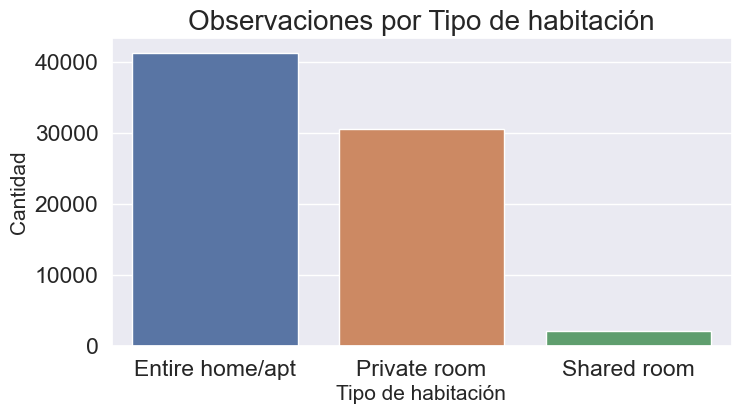

In [25]:
# Se grafica la cantidad de alojamientos en función a los distintos tipos de habitaciones
## SEABORN 2 ##

plt.figure(figsize = (8, 4))
sns.barplot(data=df_tipo_habitaciones, x='Tipo de habitaciones', y='Cantidad', hue='Tipo de habitaciones')
plt.title('Observaciones por Tipo de habitación', fontsize=20)
plt.xlabel('Tipo de habitación', fontsize=15)
plt.ylabel('Cantidad', fontsize=15)
plt.show()

([<matplotlib.patches.Wedge at 0x1f9000fc790>,
 [Text(0.2180082968309135, 1.078180125263346, 'NYC'),
  Text(-0.9361803451150763, -0.5775520421747437, 'SF'),
  Text(0.22554427810572758, -1.0766288954945276, 'DC'),
  Text(0.7256214420267761, -0.8267245749770489, 'LA'),
  Text(0.9896918603634975, -0.4801145920821815, 'Chicago'),
  Text(1.0881348775916622, -0.16112879372904962, 'Boston')],
 [Text(0.11891361645322553, 0.5880982501436433, '43.65%'),
  Text(-0.5106438246082233, -0.31502838664076926, '30.30%'),
  Text(0.12302415169403322, -0.5872521248151967, '8.68%'),
  Text(0.395793513832787, -0.45094067726020837, '7.67%'),
  Text(0.539831923834635, -0.2618806865902808, '5.02%'),
  Text(0.5935281150499975, -0.08788843294311798, '4.68%')])

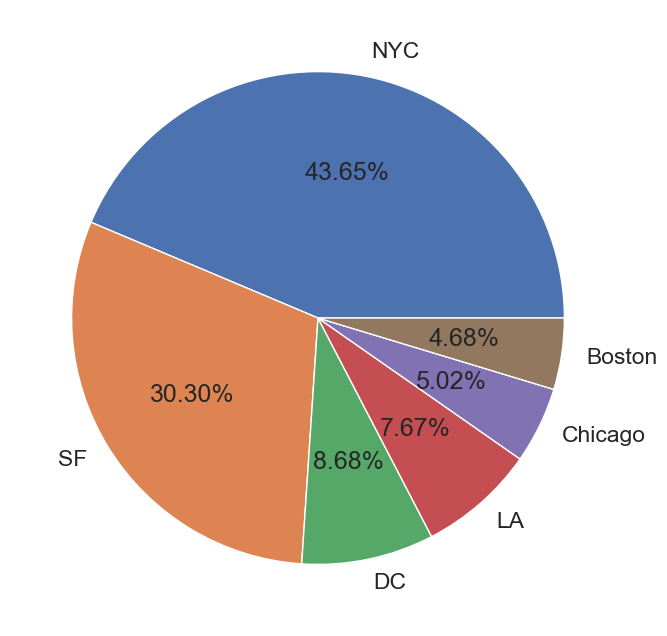

In [26]:
# Se crea un diagrama de torta con la representación de cada Ciudad 'city'
## MATPLOTLIB 2 ##

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(list(df.city.value_counts()), labels=list(df.city.unique()), autopct='%.2f%%')

El anterior gráfico muestra la amplia superioridad de ofrecimientos de alojamiento en las ciudades de Nueva York y San Francisco, contemplando prácticamente el 74% del mercado registrado en el Dataset. 

Text(0, 0.5, 'Precios')

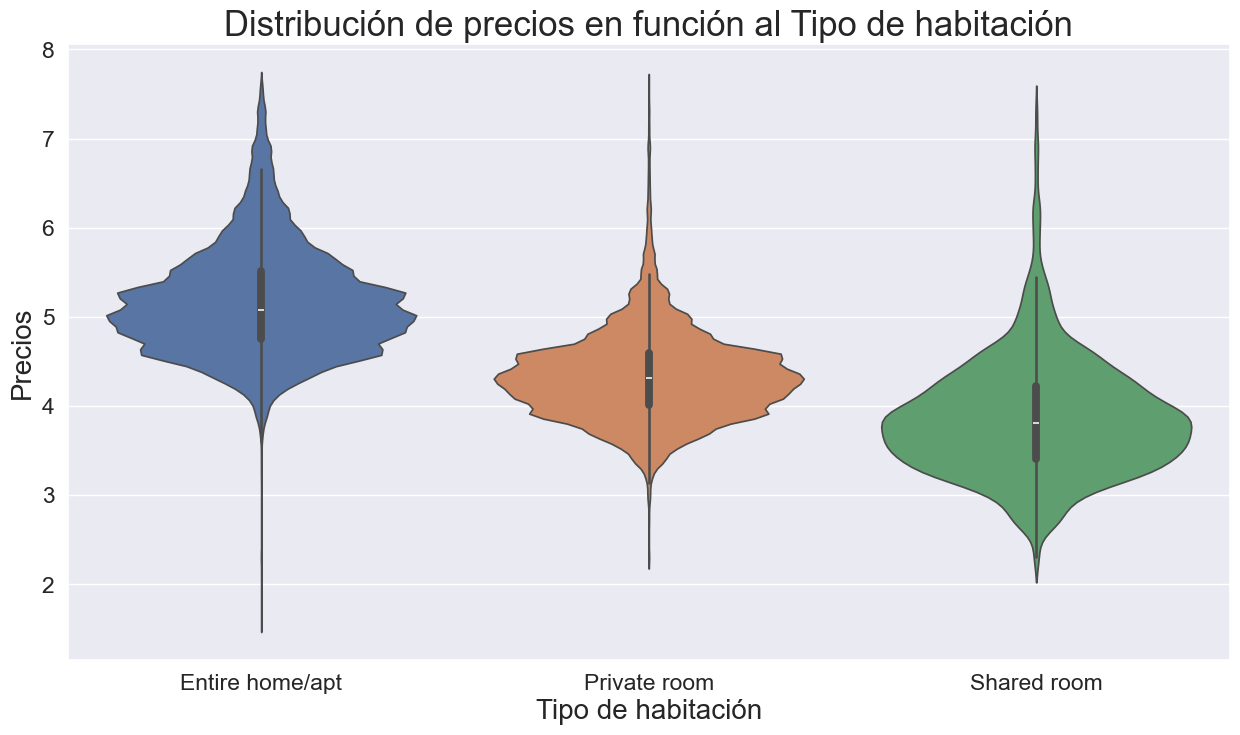

In [27]:
# Se usa con la función "violinplot" un gráfico de la densidad y distribución de precios en función al tipo
# de habitación.
## SEABORN 3 ##

plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
sns.violinplot(data=df, x='room_type', y='log_price', hue='room_type')
plt.title('Distribución de precios en función al Tipo de habitación', fontsize=25)
plt.xlabel('Tipo de habitación', fontsize=20)
plt.ylabel('Precios', fontsize=20)

En general, el precio más caro lo determina el tipo de habitación:
* si el servicio es Cuarto compartido la mediana es de 3,8 aproximadamente, 
* si el servicio es Cuarto privado la mediana es de 4,4 aproximadamente,
* si el servicio es Completo o Exclusivo la mediana es de 5,1 aproximadamente.


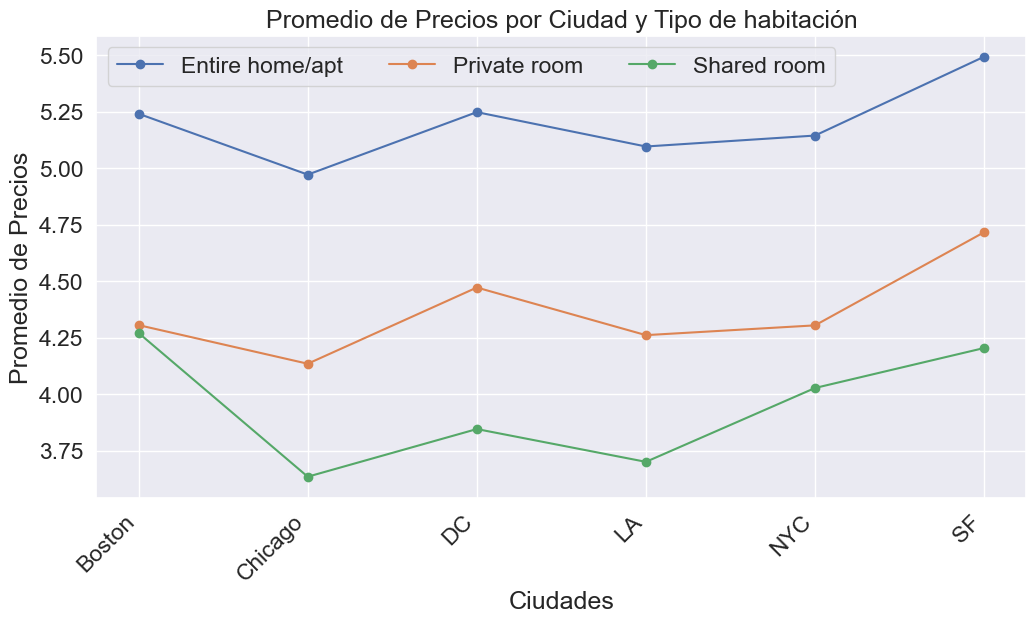

In [28]:
# Se calcula el promedio del precio 'log_price' por tipo de habitación 'room_type' y ciudad 'city'
## MATPLOTLIB 3 ##

df_promedio = df[['log_price','room_type','city']].groupby(by=['room_type','city']).mean()
df_promedio = df_promedio.reset_index()

plt.figure(figsize=(12,6))

tipo_habitaciones = df_promedio['room_type'].unique()

for i, tipo_habitaciones in enumerate(tipo_habitaciones):
    data = df_promedio[df_promedio['room_type'] == tipo_habitaciones]
    plt.plot(data['city'], data['log_price'], marker='o', linestyle='-', label=tipo_habitaciones)

plt.title('Promedio de Precios por Ciudad y Tipo de habitación')
plt.ylabel('Promedio de Precios')
plt.xlabel('Ciudades')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left', ncol=3)
plt.show()

De esta gráfica se puede observar que para cada tipo de habitación, en cada ciudad se respeta el mismo patrón de diferencia:
* aprox. 0,50 entre precios promedios de Cuarto privado y compartido,
* aprox. 1,25 entre Completo (exclusivo) y Cuarto privado.
  
salvo en las ciudades de: 
* Boston: los precios promedios de Cuarto privado y compartido son similares.
* NYC: la diferencia entre los precios promedios de Cuarto privado y compartido no son tan desiguales como en el resto de las ciudades, tan solo de 0,25.
  
Por otra parte, se refleja la diferencia de precios entre ciudades donde SF presenta los precios más elevados y Chicago los más económicos, en promedio.


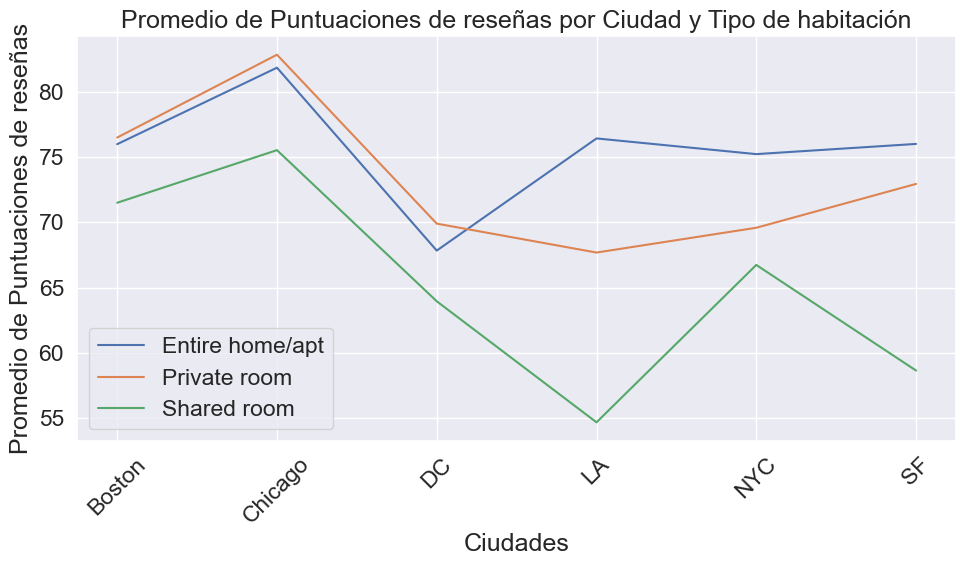

In [29]:
# Se calcula el promedio de la Puntuación de reseñas 'review_scores_rating' por tipo de habitación 
# 'room_type' y ciudad 'city'
## SEABORN 4 ##

df_avg = df[['review_scores_rating','room_type','city']].groupby(by=['room_type','city']).mean()
df_avg.head()

plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
sns.lineplot(y='review_scores_rating', x='city', hue='room_type', data=df_avg.reset_index())
plt.title('Promedio de Puntuaciones de reseñas por Ciudad y Tipo de habitación')
plt.ylabel('Promedio de Puntuaciones de reseñas')
plt.xlabel('Ciudades')
plt.xticks(rotation=45)
plt.legend(loc='lower left', ncols=1)
plt.tight_layout()
plt.show()

Si se hace el mismo análisis, pero ahora con el promedio de las Reseñas, se manifiesta que en las ciudades de Boston, Chicago y DC el patrón del promedio de puntuaciones es similar, presentando una mejor puntuación en habitaciones privadas, le siguen muy pegados los alojamientos completos (exclusivos) y con diferencia más amplia las puntuaciones de las habitaciones compartidas por debajo. Sin embargo, este comportamiento cambia para las ciudades de LA, NYC y SF donde las puntuaciones promedio más altas se evidencian en los alojamientos completos, por debajo las habitaciones privadas y más por debajo aún con las habitaciones compartidas.
Al mismo tiempo, resulta claro que las mejores puntuaciones se observan en la ciudad de Chicago mientras que LA muestra las más bajas. 

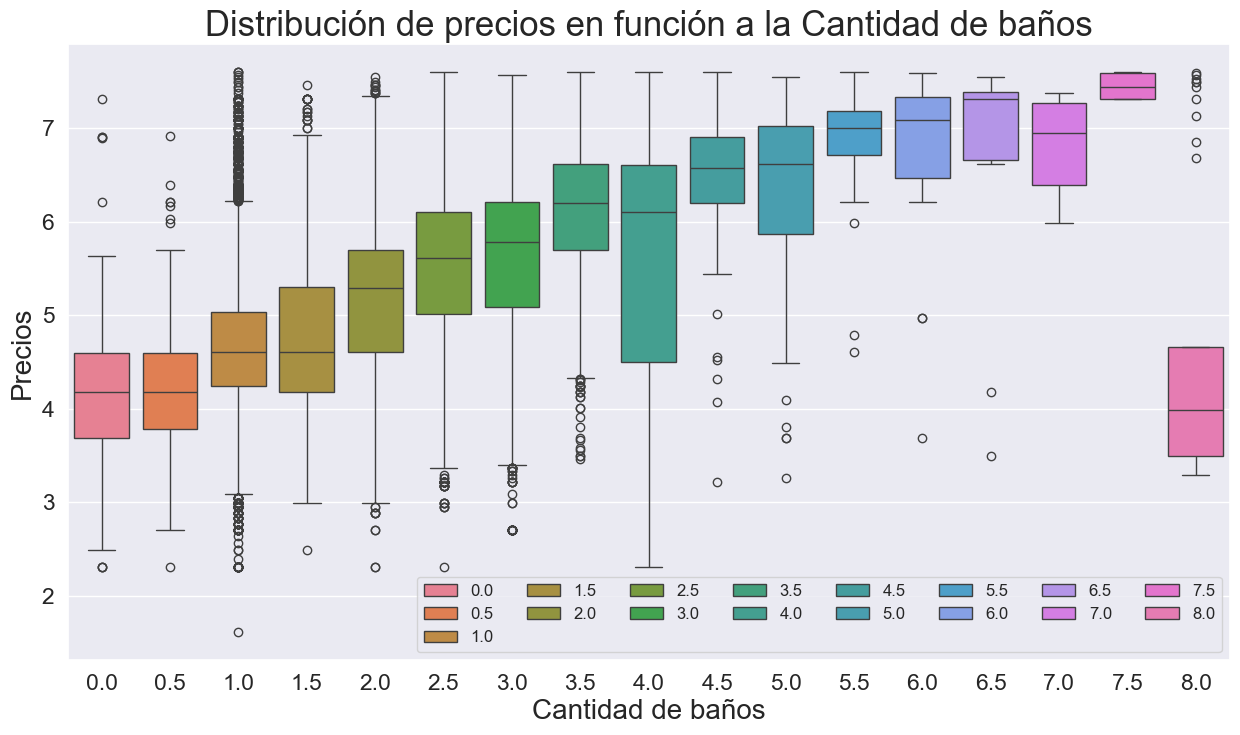

In [30]:
# Se usa con la función "boxplot" un gráfico de la densidad y distribución de precios en función a la 
# cantidad de baños.
## SEABORN 5 ##

# Se define una paleta de colores personalizada donde el número de colores se ajusta automáticamente al 
# número de categorías únicas en la columna 'bedrooms'.
custom_palette = sns.color_palette("husl", n_colors=df['bathrooms'].nunique())

plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
sns.boxplot(data=df, x='bathrooms', y='log_price', hue='bathrooms', palette=custom_palette)
plt.title('Distribución de precios en función a la Cantidad de baños', fontsize=25)
plt.xlabel('Cantidad de baños', fontsize=20)
plt.ylabel('Precios', fontsize=20)
plt.legend(loc='lower right', ncols=8, fontsize=12)

Del gráfico anterior se deduce que a medida que aumentan en los alojamientos la cantidad de baños, aumentan los precios de los mismos, salvo en alojamientos con 8 baños donde baja sustancialmente a una mediana de precio 4. Para alojamientos con 4 baños, la variabilidad de precios es mayor. 

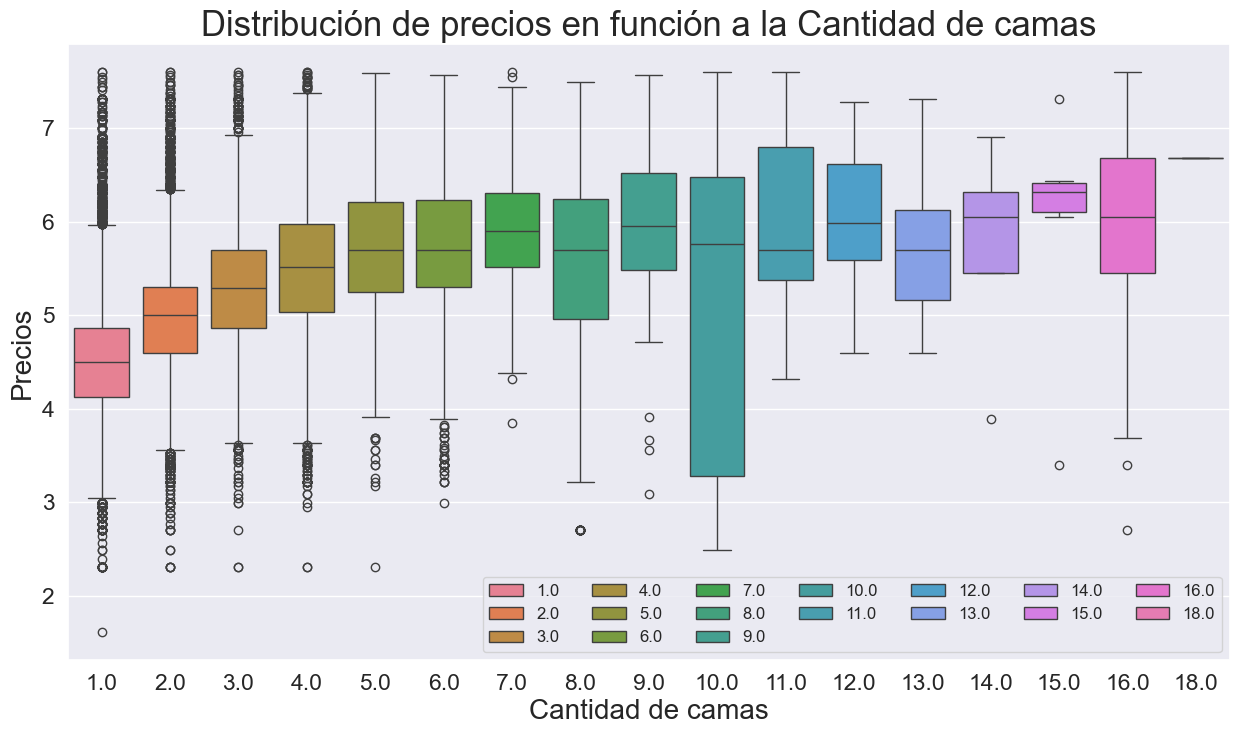

In [31]:
# Se usa con la función "boxplot" un gráfico de la densidad y distribución de precios en función a la 
# cantidad de camas.
## SEABORN 6 ##

# Se define una paleta de colores personalizada donde el número de colores se ajusta automáticamente al 
# número de categorías únicas en la columna 'bedrooms'.
custom_palette = sns.color_palette("husl", n_colors=df['beds'].nunique())

plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
sns.boxplot(data=df, x='beds', y='log_price', hue='beds', palette=custom_palette)
plt.title('Distribución de precios en función a la Cantidad de camas', fontsize=25)
plt.xlabel('Cantidad de camas', fontsize=20)
plt.ylabel('Precios', fontsize=20)
plt.legend(loc='lower right', ncols=7, fontsize=12)

Del gráfico se resuelve que hasta 4 camas los precios crecen a medida que aumenta la cantidad de camas del alojamiento. Sin embargo, desde 5 camas en adelante, la mediana se mantiene entre los precios 5,5 y 6.

### Análisis de Outliers

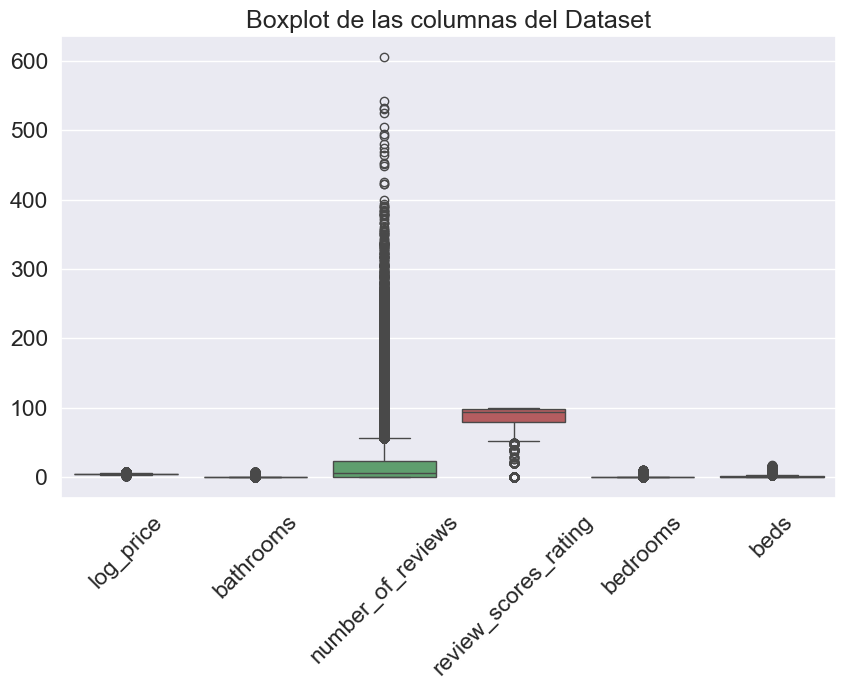

In [32]:
# Se crea un nuevo Dataframe con las variables cuantitativas solamente, elimiando las categóricas.
columnas_eliminadas = [col for col in ['property_type', 'room_type', 'accommodates', 'cleaning_fee', 'amenities', 'bed_type', 'cancellation_policy', 'city', 'first_review', 'last_review', 'neighbourhood'] if col in df.columns]
df_n = df.drop(columnas_eliminadas, axis=1)

# Se crea el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_n)
plt.title("Boxplot de las columnas del Dataset")
plt.xticks(rotation=45)
plt.show()

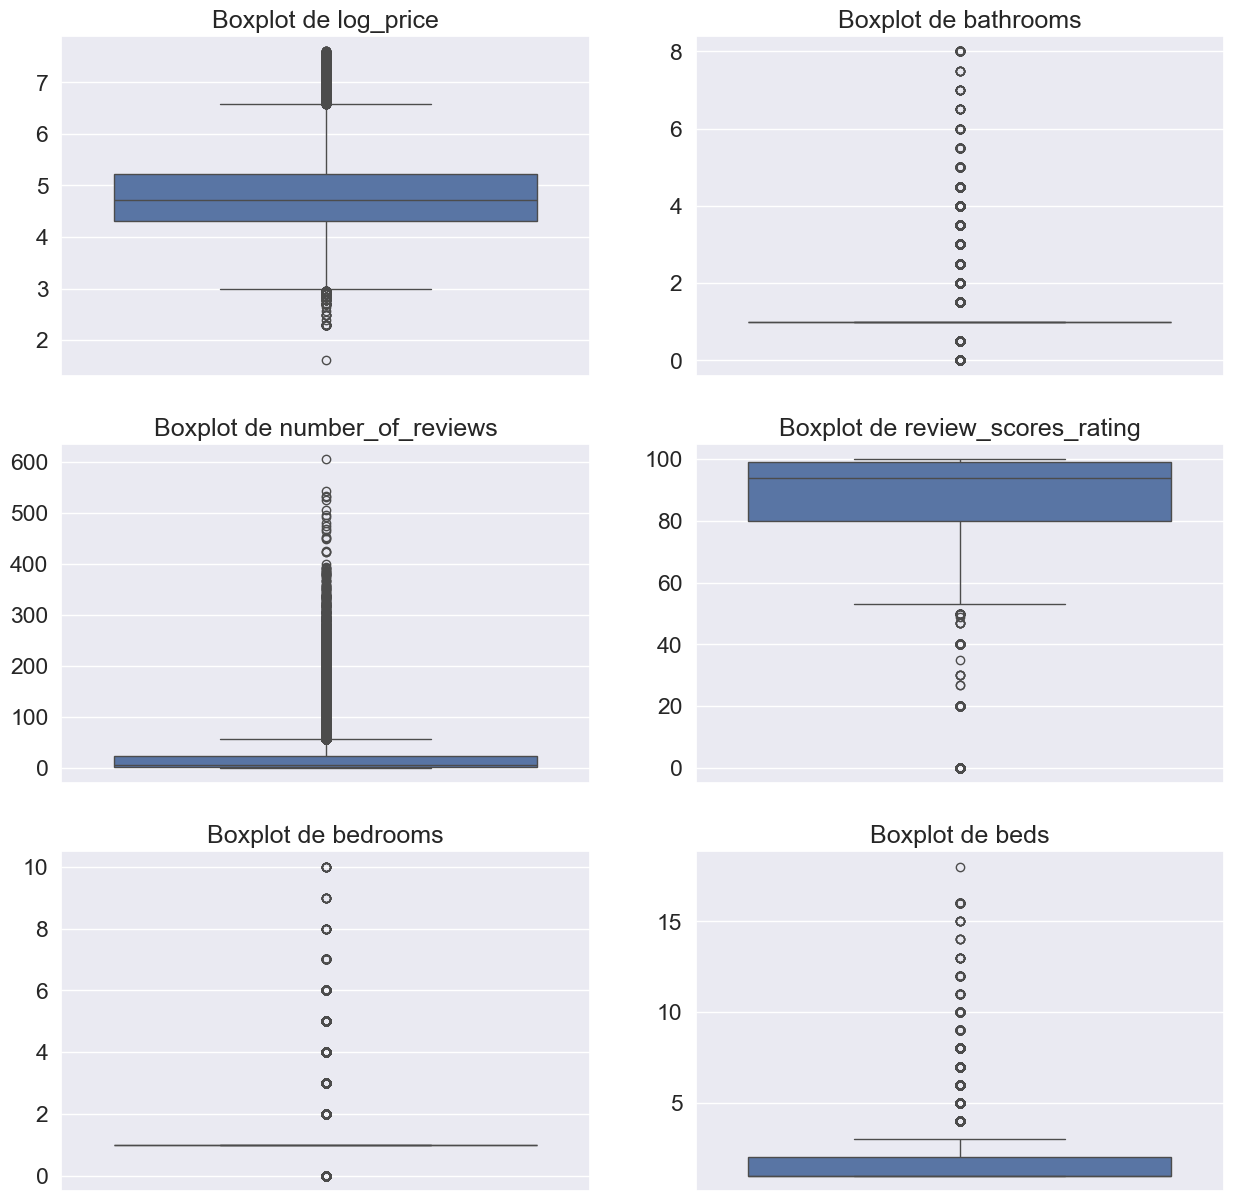

In [33]:
# Se crea subplots individual por cada columna en 3x2
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()  # Aplana el array de ejes para fácil iteración

contador = 0
for i in df_n.columns:
    sns.boxplot(data=df_n[i], ax=axes[contador])
    axes[contador].set_title(f'Boxplot de {i}')
    axes[contador].set_xlabel('')
    axes[contador].set_ylabel('')
    contador += 1


# Conclusión


En síntesis, este análisis de los datos revela varias tendencias clave en el mercado de alojamientos:
1. Precios por tipo de habitación del alojamiento: Los alojamientos completos (casas o apartamentos enteros) tienen los precios medios más altos, mientras que los hospedajes con habitaciones privadas se encuentran bastante por debajo y las compartidas son significativamente más económicas. Aunque esta tendencia es consistente en todas las ciudades analizadas, ciertas ciudades como Boston y Nueva York muestran variaciones menores en estas diferencias, lo que podría deberse a dinámicas de mercado específicas en esas áreas.
2. Impacto de la política de cancelación: En las ciudades analizadas se advierte una clara preferencia por la política 'Strict', mientras que las opciones 'Moderate' y 'Flexible' presentan una distribución casi equitativa. Es relevante destacar que las políticas 'super_strict_30' y 'super_strict_60' tienen una incidencia mínima, lo que sugiere su escasa relevancia en el mercado.
3. Diferencias entre ciudades: San Francisco lidera con los precios medios más elevados, mientras que Chicago se sitúa en el extremo opuesto con los más bajos. La distribución de precios y puntuaciones de reseñas varía según la ciudad, destacando que Chicago tiene las mejores puntuaciones promedio, mientras que Los Ángeles tiene las más bajas. Nueva York y San Francisco dominan el mercado, representando aproximadamente el 74% de las ofertas.
4. Influencias del número de baños y camas: Se observa una correlación directa entre el número de baños y camas en un alojamiento y su precio, aunque hay una estabilización en los precios cuando se superan ciertas cantidades de camas (más de 5) y baños (más de 4). Esta relación sugiere que, hasta cierto punto, aumentar el número de baños y camas incrementa el valor percibido del alojamiento.
   
En conclusión, los precios de los alojamientos están fuertemente influenciados por el tipo de propiedad, los servicios ofrecidos en sus instalaciones, la política de cancelación y la ubicación geográfica. Estas observaciones son esenciales para comprender las expectativas de precio y valoración dentro de diferentes segmentos del mercado, proporcionando una base sólida para la optimización de estrategias tanto para propietarios como para viajeros.